In [1]:
import math
import timeit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from timeit import Timer
from random import randint

In [2]:
def genRandom(n):
    return ''.join(["%s" % randint(0, 9) for num in range(0, n)])

def toInt(x):
    try:
       return int("".join(map(str, x)))
    except ValueError:
       return 0

def zeroPad(n, z, left = True):
    for i in range(z):
        if left:
            n = '0' + n
        else:
            n = n + '0'
    return n

In [3]:
def gradeSchool(x, y):
    x = str(x)
    y = str(y)

    zeroPadding = 0
    partialSum = 0

    for i in range(len(y) -1, -1, -1):        
        carry = 0
        partial = ''
        partial = zeroPad(partial, zeroPadding, False)
        
        for j in range(len(x) -1, -1, -1):
            z = int(y[i]) * int(x[j])
            z += carry
            z = str(z)
            
            if len(z) > 1:
                carry = int(z[0])
            else:
                carry = 0  
            partial = z[len(z) -1] + partial

        if carry > 0:
            partial = str(carry) + partial
  
        partialSum += int(partial)
        zeroPadding += 1
        
    return partialSum

def divideConquer(x, y, verbose=False):
    x = str(x)
    y = str(y)

    if len(x) == 1 and len(y) == 1:
        return int(x) * int(y)
    
    if len(x) < len(y):
        x = zeroPad(x, len(y) - len(x))
    elif len(y) < len(x):
        y = zeroPad(y, len(x) - len(y))
        
    n = len(x)
    m = int(math.ceil(float(n) / 2))
    
    X1 = int(x[:m])
    X0 = int(x[m:])
    Y1 = int(y[:m])
    Y0 = int(y[m:])
    
    if (verbose):
        print("m:" + str(m))
        print("X1:" + str(X1))
        print("X0:" + str(X0))
        print("Y1:" + str(Y1))
        print("Y0:" + str(Y0))
        print("================")

    X0Y0 = divideConquer(X0, Y0)
    X0Y1 = divideConquer(X0, Y1)
    X1Y0 = divideConquer(X1, Y0)
    X1Y1 = divideConquer(X1, Y1)
    
    if (verbose):
        print("X0Y0:" + str(X0Y0))
        print("X0Y1:" + str(X0Y1))
        print("X1Y0:" + str(X1Y0))
        print("X1Y1:" + str(X1Y1))
        print("================")
    
    BZeroPad = n - m
    AZeroPad = BZeroPad * 2
    
    A = int(zeroPad(str(X1Y1), AZeroPad, False))
    B = int(zeroPad(str(X1Y0 + X0Y1), BZeroPad, False))
    C = X0Y0
    
    if (verbose):
        print("A:" + str(A))
        print("B:" + str(B))
        print("C:" + str(C))
        print("================")
    
    return A + B + C

def karatsuba(x, y, verbose=False):
    x = str(x)
    y = str(y)

    if len(x) == 1 and len(y) == 1:
        return int(x) * int(y)
    
    if len(x) < len(y):
        x = zeroPad(x, len(y) - len(x))
    elif len(y) < len(x):
        y = zeroPad(y, len(x) - len(y))
        
    n = len(x)
    m = int(math.ceil(float(n) / 2))
    
    X1 = int(x[:m])
    X0 = int(x[m:])
    Y1 = int(y[:m])
    Y0 = int(y[m:])
    
    if (verbose):
        print("m:" + str(m))
        print("X1:" + str(X1))
        print("X0:" + str(X0))
        print("Y1:" + str(Y1))
        print("Y0:" + str(Y0))
        print("================")

    X1Y1 = karatsuba(X1, Y1)
    X0Y0 = karatsuba(X0, Y0)
    P = karatsuba(X1 + X0, Y1 + Y0)
    
    if (verbose):
        print("X0Y0:" + str(X0Y0))
        print("X1Y1:" + str(X1Y1))
        print("P:" + str(P))
        print("================")
    
    BZeroPad = n - m
    AZeroPad = BZeroPad * 2
    
    A = int(zeroPad(str(X1Y1), AZeroPad, False))
    B = int(zeroPad(str(P - X1Y1 - X0Y0), BZeroPad, False))
    C = X0Y0
    
    if (verbose):
        print("A:" + str(A))
        print("B:" + str(B))
        print("C:" + str(C))
        print("================")
    
    return A + B + C

In [4]:
print("Grade School")
print("================")
b = gradeSchool(12, 12)
print("Result: " + str(b))
print("================")

print("\n\nDivide & Conquer")
print("================")
d = divideConquer(12, 12, True)
print("Result: " + str(d))
print("================")

print("\n\nKaratsuba")
print("================")
k = karatsuba(12, 12, True)
print("Result: " + str(k))
print("================")

Grade School
Result: 144


Divide & Conquer
m:1
X1:1
X0:2
Y1:1
Y0:2
X0Y0:4
X0Y1:2
X1Y0:2
X1Y1:1
A:100
B:40
C:4
Result: 144


Karatsuba
m:1
X1:1
X0:2
Y1:1
Y0:2
X0Y0:4
X1Y1:1
P:9
A:100
B:40
C:4
Result: 144


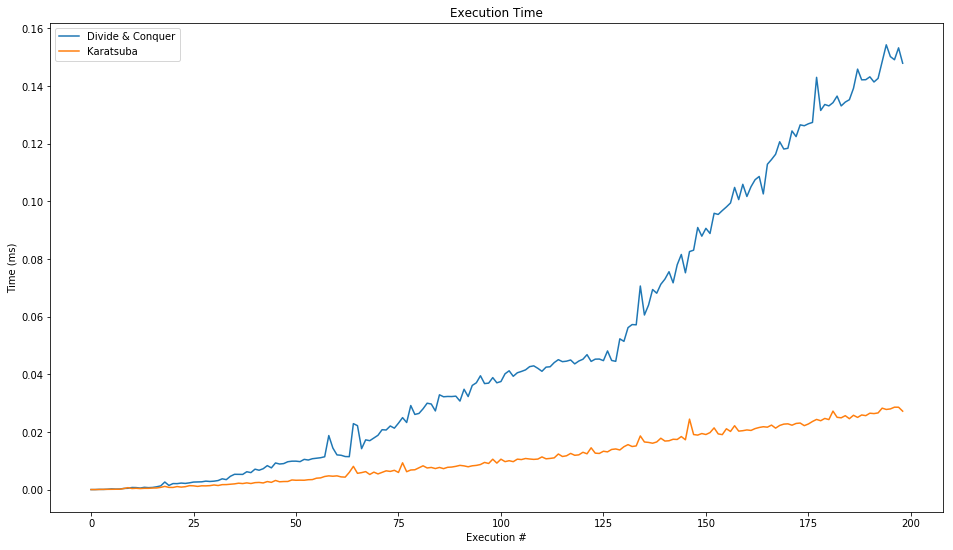

In [5]:
tg = []
td = []
tk = []

for i in range(1, 200):        
    r = genRandom(i)
    n = toInt(r)
    
#     rg = Timer(lambda: gradeSchool(n, n))
#     rt = rg.repeat(repeat=3,number=1)
#     tg.append(np.mean(rt))
    
    rd = Timer(lambda: divideConquer(n, n))
    rt = rd.repeat(repeat=3,number=1)
    td.append(np.mean(rt))

    rk = Timer(lambda: karatsuba(n, n))
    rt = rk.repeat(repeat=3,number=1)
    tk.append(np.mean(rt))
    
plt.rcParams["figure.figsize"] = [16,9]
# plt.plot(tg, label="Grade School")
plt.plot(td, label="Divide & Conquer")
plt.plot(tk, label="Karatsuba")
plt.legend(loc="upper left")
plt.title("Execution Time")
plt.xlabel("Execution #")
plt.ylabel("Time (ms)")
plt.show()